# Network Analysis | Uber 
## Ray Johnson

My name is Ray Johnson and I am a student finishing my final semester at the Graduate School of Information Science at the University of Illinois in Urbana-Champaign. 

I end this semester with three courses on Statistical Modeling (with R), an Introduction to Programming with Python, and Network Analysis. In addition, I have had a course in Data Cleaning, Introduction to Databases with MySql, and a Web Design and Accessibility course for Organizations.

I've acquired certificates from Lynda.com in Introduction to Programming with JavaScript, and completed three certificates from John Hopkin's Data Science specialization in Data Science.

I intend to employ methods I've learned in and out of the university to explore the datasets released to the public with the Freedom of Information Act, in order to see what I can glean from their data. 


## About the Data (Data Sources Listed Below, see 'Data' Under 'Bibliography')

Information here is paraphrased in part from source listed in Bibliography as "Uber Pickups in New York City," and specific uber drives with context for purpose of drives are cited from "My Uber Drives Dataset" listed below.

FiveThirtyEight obtained data of 4.5 million Uber pickups in New York City from April to September 2014, then 14.3 additional Uber pickups from January to June 2015. 

FiveThirtyEight obtained the data from the NYC Taxi and Limousine Commission (TLC) via Freedom of Information Law request on July 20, 2015. 

- Uber Trip data from 2014 (April-September) separated by month - detailed location info
- Uber trip data from 2015 (January-June), less fine-grained location information

- Non-Uber For-Hire-Vehicle Trips; while varying by company, the observations might include "day of trip," "time of trip," "pickup location," "driver's for-hire license number," and "vehicle's for hire license number."

### Trip Data from 2014, FiveThirtyEight

Six files containing raw data of Uber pickups in NYC from April to September 2014, separated by month.

Each has the following columns:
Date/Time : The date and time of the Uber pickup
Lat : The latitude of the Uber pickup
Lon : The longitude of the Uber pickup
Base : The TLC base company code affiliated with the Uber pickup

These files are named:

uber-raw-data-apr14.csv
uber-raw-data-aug14.csv
uber-raw-data-jul14.csv
uber-raw-data-jun14.csv
uber-raw-data-may14.csv
uber-raw-data-sep14.csv
Uber trip data from 2015

Also included is the file uber-raw-data-janjune-15.csv This file has the following columns:

Dispatching_base_num : The TLC base company code of the base that dispatched the Uber
Pickup_date : The date and time of the Uber pickup
Affiliated_base_num : The TLC base company code affiliated with the Uber pickup
locationID : The pickup location ID affiliated with the Uber pickup
The Base codes are for the following Uber bases:

B02512 : Unter B02598 : Hinter B02617 : Weiter B02682 : Schmecken B02764 : Danach-NY B02765 : Grun B02835 : Dreist B02836 : Drinnen

For coarse-grained location information from these pickups, the file taxi-zone-lookup.csv shows the taxi Zone (essentially, neighborhood) and Borough for each locationID.

Non-Uber FLV trips

The dataset also contains 10 files of raw data on pickups from 10 for-hire vehicle (FHV) companies. The trip information varies by company, but can include day of trip, time of trip, pickup location, driver's for-hire license number, and vehicle's for-hire license number.

These files are named:

American_B01362.csv
Diplo_B01196.csv
Highclass_B01717.csv
Skyline_B00111.csv
Carmel_B00256.csv
Federal_02216.csv
Lyft_B02510.csv
Dial7_B00887.csv
Firstclass_B01536.csv
Prestige_B01338.csv
Aggregate Statistics

There is also a file other-FHV-data-jan-aug-2015.csv containing daily pickup data for 329 FHV companies from January 2015 through August 2015.

The file Uber-Jan-Feb-FOIL.csv contains aggregated daily Uber trip statistics in January and February 2015.

## My Uber Drives (2016) | Dataset of Uber Driver Zeeshan-ul-hassan Usmani
### Content
Geography: USA, Sri Lanka and Pakistan

Time period: January - December 2016

Unit of analysis: Drives

Total Drives: 1,155

Total Miles: 12,204

Dataset: The dataset contains Start Date, End Date, Start Location, End Location, Miles Driven and Purpose of drive (Business, Personal, Meals, Errands, Meetings, Customer Support etc.)

## Uber_NYC_Enriched, Yannis Pappas 
### Content
https://www.kaggle.com/yannisp/uber-pickups-enriched
CSV file of Uber Pickups in NYC from 01/01/15-06/30/15, with weather data from National Centers for Environmental Information, LocationID to Burough mapping by FiveThirtyEight, and NYC public holidays.

From YannisPappas' Kaggle Page:
- pickup_dt: Time period of the observations.

- borough: NYC's borough.

- pickups: Number of pickups for the period.

- spd: Wind speed in miles/hour.

- vsb: Visibility in Miles to nearest tenth.

- temp: temperature in Fahrenheit.

- dewp: Dew point in Fahrenheit.

- slp: Sea level pressure.

- pcp01: 1-hour liquid precipitation.

- pcp06: 6-hour liquid precipitation.

- pcp24: 24-hour liquid precipitation.

- sd: Snow depth in inches.

- hday: Being a holiday (Y) or not (N).

# On the Resources Used:

The work listed below is cited according to the standards of the seventh edition of the Modern Language Association. 
This aspect of workflow benefitted from Zotero; an auto-generated report of listed sources, including abstracts from works consulted, can be found at this web address: http://cpanel.ischool.illinois.edu/~rrjohns2/bibreport.html 

### Importing Necessary Modules for Processing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx # 'creation, manipulation, and study of structure, dynamics, and functions of complex networks' 
import matplotlib.pyplot as plt # plotting library/numerical mathematics extensions
import seaborn as sns # attractive/informative stat graphics in Python - built on top of matplotlib
import datetime
from sklearn.cluster import KMeans # K-Means Clustering
from sklearn.decomposition import PCA # Principal Component Analysis Module

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory




The below inline function allows graphs displayed from matplotlib's library to be displayed inline (on the Jupyter notebook, as opposed to in an outside window). This is a common preference amongst sources (See "Mastering matplotlib" first page of Chapter 4: Event Handling and Interactive Plots).

In [2]:
%matplotlib inline 

Create dataframe for January-February Uber data. Data is stored on an external hard drive. 

In [3]:
dfJanFeb =pd.read_csv("D:/networkUber/pickupsNY/Uber-Jan-Feb-FOIL.csv") # reads and creates df

In [43]:
# print "shape" of data frame
dfJanFeb.shape

(354, 4)

There are a total of 354 observations of four columns.

In [ ]:
# 

## Linear Regression

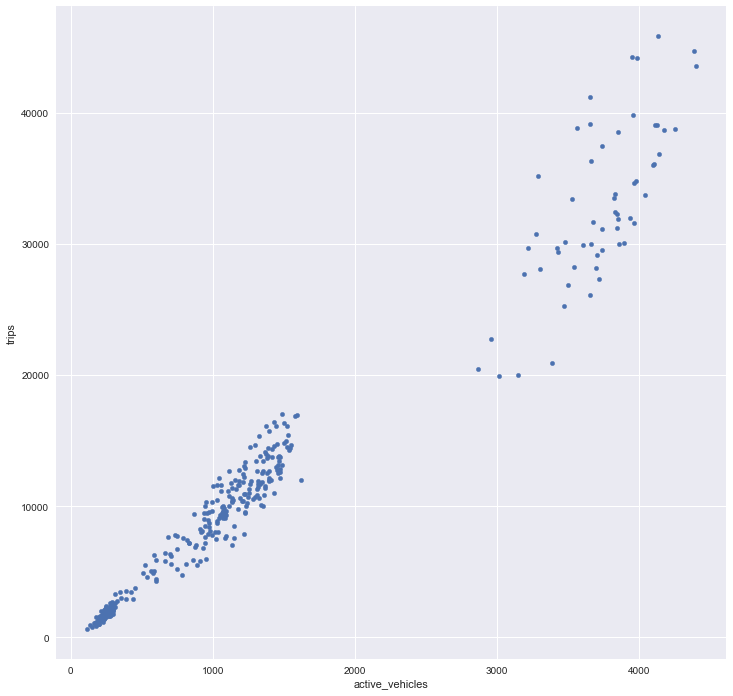

In [54]:
# to test out relationships between variables, I'd like to utilize a scatterplot and check for a linear relationship between active_vehicles and trips
dfJanFeb.plot(kind='scatter', x='active_vehicles', y='trips', figsize=(12,12))

In [42]:
# We can compute the linear regression line for the relationship using scipy's module linregress
from scipy.stats import linregress
rv = dfJanFeb.as_matrix(columns=['active_vehicles', 'trips'])
a, b, r, p, stderr = linregress(rv)
print(a, b, r, p, stderr)



8.98104812156 -74.8205203389 0.980492539725 8.79590426331e-251 0.0959617963385


In [ ]:
dfJanFeb.plot(kind='scatter', x='active_vehicles', 'trips'])

In [4]:
print(dfJanFeb)

    dispatching_base_number       date  active_vehicles  trips
0                    B02512   1/1/2015              190   1132
1                    B02765   1/1/2015              225   1765
2                    B02764   1/1/2015             3427  29421
3                    B02682   1/1/2015              945   7679
4                    B02617   1/1/2015             1228   9537
5                    B02598   1/1/2015              870   6903
6                    B02598   1/2/2015              785   4768
7                    B02617   1/2/2015             1137   7065
8                    B02512   1/2/2015              175    875
9                    B02682   1/2/2015              890   5506
10                   B02765   1/2/2015              196   1001
11                   B02764   1/2/2015             3147  19974
12                   B02765   1/3/2015              201   1526
13                   B02617   1/3/2015             1188  10664
14                   B02598   1/3/2015              818

In [5]:
#count how many instances of each date there is
dfJanFeb['date'].value_counts()


1/30/2015    6
1/7/2015     6
1/26/2015    6
1/18/2015    6
1/22/2015    6
2/26/2015    6
1/8/2015     6
1/13/2015    6
2/16/2015    6
1/10/2015    6
1/25/2015    6
2/5/2015     6
2/28/2015    6
2/15/2015    6
2/27/2015    6
2/19/2015    6
1/28/2015    6
1/11/2015    6
1/2/2015     6
1/15/2015    6
2/4/2015     6
1/3/2015     6
2/23/2015    6
1/1/2015     6
1/21/2015    6
1/5/2015     6
1/27/2015    6
2/11/2015    6
2/22/2015    6
1/14/2015    6
1/20/2015    6
2/1/2015     6
2/13/2015    6
1/17/2015    6
1/31/2015    6
2/8/2015     6
1/16/2015    6
2/18/2015    6
2/9/2015     6
1/24/2015    6
1/19/2015    6
2/12/2015    6
1/6/2015     6
2/14/2015    6
1/9/2015     6
2/21/2015    6
2/10/2015    6
2/20/2015    6
1/23/2015    6
1/29/2015    6
2/17/2015    6
1/12/2015    6
2/25/2015    6
2/3/2015     6
2/6/2015     6
2/7/2015     6
1/4/2015     6
2/2/2015     6
2/24/2015    6
Name: date, dtype: int64

Count how many trips were taken from different base numbers included in data; ignore sorting, because the value is verifiably consistent from each.

In [6]:
#creating date dataframe
datedf=dfJanFeb.loc[:,'active_vehicles']



In [7]:
# Total Active Cars for this time period in NYC
dfJanFeb['active_vehicles'].sum()

462832

In [8]:
# Max Active Cars for this time period in NYC
dfJanFeb['active_vehicles'].max()

4395

In [9]:
# Mimimum
dfJanFeb['active_vehicles'].min()

112

In [10]:
# Non-Null Unique Entries - entries where the amount of active vehicles weren't the same as another time
dfJanFeb['active_vehicles'].nunique()

314

In [11]:
# count number of dates 
dfJanFeb['date'].count()

354

In [12]:
# using Pandas, we can group by date and sum the active_vehicles for the date listed
dfJanFeb.groupby('date')['active_vehicles'].sum()

date
1/1/2015     6885
1/10/2015    7346
1/11/2015    6571
1/12/2015    7364
1/13/2015    7559
1/14/2015    7849
1/15/2015    8080
1/16/2015    8273
1/17/2015    7527
1/18/2015    6863
1/19/2015    5945
1/2/2015     6330
1/20/2015    7592
1/21/2015    7948
1/22/2015    8267
1/23/2015    8490
1/24/2015    7643
1/25/2015    6787
1/26/2015    6533
1/27/2015    3496
1/28/2015    7815
1/29/2015    8376
1/3/2015     6510
1/30/2015    8693
1/31/2015    8223
1/4/2015     5838
1/5/2015     6884
1/6/2015     7216
1/7/2015     7444
1/8/2015     7999
1/9/2015     7989
2/1/2015     7752
2/10/2015    8029
2/11/2015    8515
2/12/2015    9123
2/13/2015    9604
2/14/2015    8973
2/15/2015    7939
2/16/2015    7551
2/17/2015    8403
2/18/2015    8442
2/19/2015    9030
2/2/2015     7080
2/20/2015    9649
2/21/2015    8765
2/22/2015    7620
2/23/2015    8197
2/24/2015    8773
2/25/2015    8830
2/26/2015    9227
2/27/2015    9486
2/28/2015    8681
2/3/2015     7840
2/4/2015     8185
2/5/2015     8833
2/6/2

# Pandas has a wide array of Useful Functions for Statistics


In [13]:
# mean
dfJanFeb['active_vehicles'].mean()

1307.4350282485875

In [14]:
# mode
dfJanFeb['active_vehicles'].mode()

0    238
dtype: int64

In [15]:
#unbiased standard deviation
dfJanFeb['active_vehicles'].std()

1162.5106256246545

In [24]:
uberApril2014 = pd.read_csv("D:/networkUber/pickupsNY/uber-raw-data-apr14.csv", index_col = False)
uberApril2014.columns=['Date', 'Latitude', 'Longitude', 'Base']
uberApril2014.drop(['Base'], axis=1, inplace=True)

In [31]:
uberApril2014["Type"]="Uber"
uberApril2014["Date"]=pd.to_datetime(uberApril2014["Date"]).dt.strftime('%Y-%m-%d-%H')

In [ ]:
uberJanJune15df = pd.read_csv("D:/networkUber/pickupsNY/uber-raw-data-janjune-15.csv")

### Matplotlib

In [20]:
enhancedJanJune15 = pd.read_csv("D:/networkUber/uber_nyc_enriched.csv")

The following dataset is from one drivers' experience; see "My Uber Drives" below. This dataset will be the one where I utilize network analysis.

In [28]:
networkUber16 = pd.read_csv("D:/networkUber/myuberdrives2016.csv")

In [29]:
networkUber16.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


As you can see above, there are several different observations which are grounded more contextually than in the other datasets. 

In [30]:
# let's check to see what the current object is now stored as 
networkUber16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Data Cleaning

In [ ]:
# Missing Values


# Works Consulted

### Books:

Downey, Allen B. Think Complexity. N.p. Web. 18 Apr. 2017. 1.2.3.

### Book Sections
Brownley, Clinton W. “Concatenate Data from Multiple Workbooks.” Working with 
Excel Files in Python. O’Reilly Media, Inc., 2016. Safari Books Online. Web. 8 May 2017.

Diener, Michael. “Python Geospatial Analysis Cookbook.” Python Geospatial 
Analysis Cookbook. Packt Publishing, 2015. Safari Books Online. Web. 8 May 2017.

ericmjl. “Network-Analysis-Made-Simple.” GitHub. N.p., n.d. Web. 21 Apr. 2017.

Fandango, Armando. “Statistics and Linear Algebra.” Python Data Analysis - Second Edition. 2nd ed. Packt Publishing, 2017. Safari Books Online. Web. 8 May 2017.

Idris, Ivan. “Creating Attractive Data Visualizations.” Python Data Analysis 
Cookbook. Packt Publishing, 2016. Safari Books Online. Web. 8 May 2017.

Lawhead, Joel. “Automating QGIS.” QGIS Python Programming Cookbook - Second Edition. 2nd ed. Packt Publishing, 2017. Safari Books Online. Web. 8 May 2017.

Madhavan, Samir. “Uncovering Machine Learning.” Mastering Python for Data Science. Packt Publishing, 2015. Safari Books Online. Web. 8 May 2017.

McKinney, Wes. “Data Loading, Storage, and File Formats.” Python for Data Analysis. O’Reilly Media, Inc., 2012. Safari Books Online. Web. 8 May 2017.

---. “Data Wrangling: Clean, Transform, Merge, Reshape.” Python for Data Analysis. O’Reilly Media, Inc., 2012. Safari Books Online. Web. 8 May 2017.

---. “Plotting and Visualization.” Python for Data Analysis. O’Reilly Media, Inc., 2012. Safari Books Online. Web. 8 May 2017.

Mueller, John Paul, and Luca Massaron. “Dealing with Dates in Your Data.” Python for Data Science For Dummies. For Dummies, 2015. Safari Books Online. Web. 8 May 2017.

---. “Dealing with Missing Data.” Python for Data Science For Dummies. For Dummies, 2015. Safari Books Online. Web. 8 May 2017.

---. “Visualizing the Data.” Python for Data Science For Dummies. For Dummies, 2015. Safari Books Online. Web. 8 May 2017.

Nelli, Fabio. “Appendix B: Open Data Sources.” Python Data Analytics: Data Analysis and Science Using Pandas, Matplotlib, and the Python Programming Language. Apress, 2015. Safari Books Online. Web. 8 May 2017.

---. “Data Visualization with Matplotlib.” Python Data Analytics: Data Analysis and Science Using Pandas, Matplotlib, and the Python Programming Language. Apress, 2015. Safari Books Online. Web. 8 May 2017.

---. “Python and Data Analysis.” Python Data Analytics: Data Analysis and Science Using Pandas, Matplotlib, and the Python Programming Language. Apress, 2015. Safari Books Online. Web. 8 May 2017.

Persson, Magnus Vilhelm, and Luiz Felipe Martins. “A. More on Jupyter Notebook and Matplotlib Styles.” Mastering Python Data Analysis. Packt Publishing, 2016. Safari Books Online. Web. 8 May 2017.

---. “Learning About Models.” Mastering Python Data Analysis. Packt Publishing, 2016. Safari Books Online. Web. 8 May 2017.

Squire, Megan. “Expanding Your Data Mining Toolbox.” Mastering Data Mining with Python – Find Patterns Hidden in Your Data. Packt Publishing, 2016. Safari Books Online. Web. 8 May 2017.

Subramanian, Gopi. “Data Analysis – Explore and Wrangle.” Python Data Science Cookbook. Packt Publishing, 2015. Safari Books Online. Web. 8 May 2017.
Vo.T.H, Phuong et al. “Advanced Uses of Pandas for Data Analysis.” Python: Data Analytics and Visualization. Packt Publishing, 2017. Safari Books Online. Web. 8 May 2017.


### DataCamp Course:

Ma, Eric. “Introduction to Networks | Python.” Web. 21 Apr. 2017.

### GitHub Repository Walk-Throughs:

ericmjl. “Network-Analysis-Made-Simple.” GitHub. Web. 18 Apr. 2017. https://github.com/ericmjl/Network-Analysis-Made-Simple.

briatte. "Awesome Network Analysis." GitHub. 14 Apr. 2017
https://github.com/briatte/awesome-network-analysis.

"Network Analysis Made Simple." GitHub. 14 Apr. 2017.
https://github.com/ericmjl/Network-Analysis-Made-Simple

## Data Resources

### Uber Data - Over 4.5 Million Uber pick ups in New York City Explored

andrewflowers. “Fivethirtyeight/Uber-Tlc-Foil-Response.” GitHub. Web. 16 Apr. 2017.
https://github.com/toddwschneider/nyc-taxi-data.

"Social Network Analysis with Python," a talk given by Maksim Tsvetovat and Alex Kouznetsov at PyCon 2012.
https://github.com/maksim2042/PyCon2012

### "My Uber Drives" Data
Zeeshan-ul-hassan Usmani, My Uber Drives Dataset, Kaggle Dataset Repository, March 23, 2017.”

### "Uber Pickups in New York City" Data
“Uber Pickups in New York City.” N.p., n.d. Web. 8 May 2017. https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city

### Freedom of Information Act - FOIL Datasets, Uber

https://github.com/fivethirtyeight/uber-tlc-foil-response/tree/master/uber-trip-data

https://archive.org/details/nycTaxiTripData2013